# Unsupervised Learning: Clustering

In classification (supervised), we try to find boundaries/rules to separate points according to pre-determined labels.

In clustering, the algorithm chooses the labels.  Goal is to choose labels so that similar rows get labeled the same.

Today: K-Means Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
x, y = datasets.make_blobs(n_samples=100, centers=3, cluster_std=1.2, random_state=3)
df = pd.DataFrame(x, columns=["x0", "x1"])
df.head()

,x0,x1
0,8.370099,7.747045
1,-2.701740,0.395336
2,-3.204128,-0.407438
3,-3.132762,-1.335692
4,7.152737,6.069995


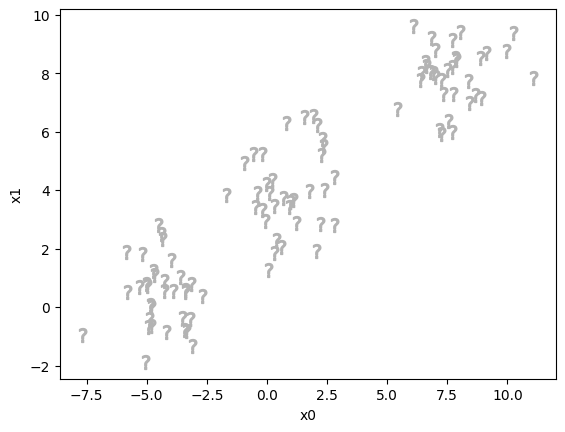

In [3]:
# x0 => x-axis
# x1 => y-axis
# cluster => marker type
def km_scatter(df, **kwargs):
    ax = kwargs.pop("ax", None)
    if not "label" in df.columns:
        return df.plot.scatter(x="x0", y="x1", marker="$?$", ax=ax, **kwargs)

    for marker in set(df["label"]):
        sub_df = df[df["label"] == marker]
        ax = sub_df.plot.scatter(x="x0", y="x1", marker=marker, ax=ax, **kwargs)
    return ax

ax = km_scatter(df, s=100, c="0.7")

# Hard Problem

Finding the best answer.

# Easier Problem

Taking a bad answer and make it a little better.  Then repeat!

<AxesSubplot:xlabel='x0', ylabel='x1'>

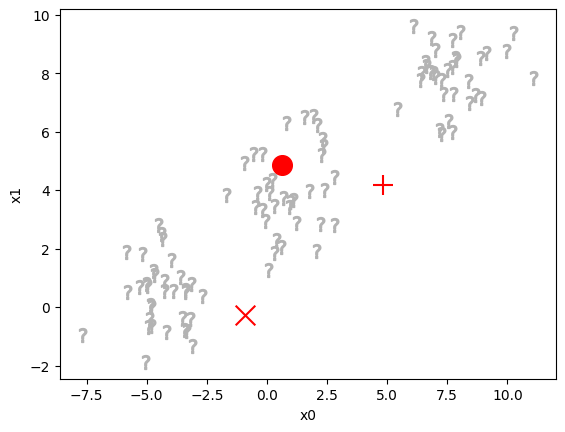

In [4]:
clusters = np.random.uniform(-5, 5, size=(3,2))
clusters = pd.DataFrame(clusters, columns=["x0", "x1"])
clusters["label"] = ["o", "+", "x"]

ax = km_scatter(df, s=100, c="0.7")
km_scatter(clusters, s=200, c="red", ax=ax)

In [5]:
clusters

,x0,x1,label
0,0.621013,4.873708,o
1,4.844856,4.161413,+
2,-0.894615,-0.266636,x


In [6]:
df.head()

,x0,x1
0,8.370099,7.747045
1,-2.701740,0.395336
2,-3.204128,-0.407438
3,-3.132762,-1.335692
4,7.152737,6.069995


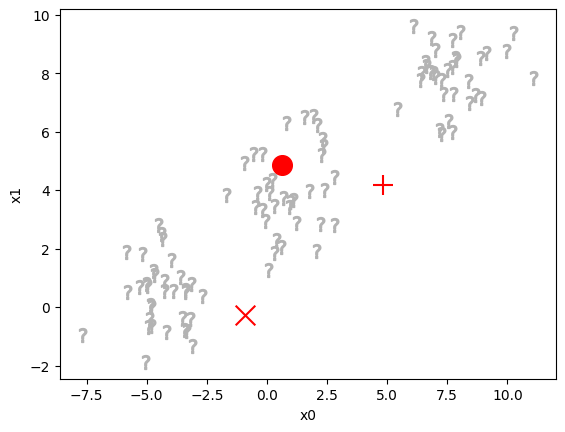

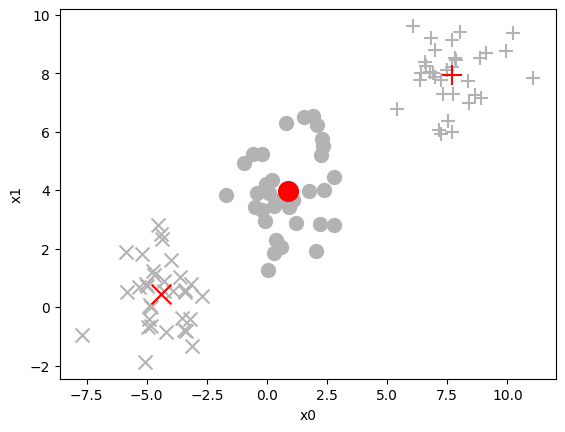

In [7]:
class KM:
    def __init__(self, df, clusters):
        self.df = df.copy()
        self.clusters = clusters.copy()
        self.labels = clusters["label"].values
        
    def plot(self):
        ax = km_scatter(self.df, color="0.7", s=100)
        km_scatter(self.clusters, ax=ax, color="red", s=200)
        
    def assign_points(self):
        for center in self.clusters.itertuples():
            x0_diff = df["x0"] - center.x0
            x1_diff = df["x1"] - center.x1
            distances = (x0_diff ** 2 + x1_diff ** 2) ** 0.5
            self.df[center.label] = distances
        self.df["label"] = self.labels[self.df[self.labels].values.argmin(axis=1)] # get label of nearest centroid
    
    def update_centers(self):
        for center in self.clusters.itertuples():
            subset_df = self.df[self.df["label"] == center.label]
            if len(subset_df) > 0:
                x0 = subset_df["x0"].mean()
                x1 = subset_df["x1"].mean()
                self.clusters.at[center.Index, "x0"] = x0
                self.clusters.at[center.Index, "x1"] = x1

km = KM(df, clusters)
km.plot()

for i in range(10):
    km.assign_points()
    km.update_centers()
    
km.plot()

In [8]:
km.df

,x0,x1,o,+,x,label
0,8.370099,7.747045,8.399553,0.695505,14.727486,+
1,-2.701740,0.395336,5.057144,12.838494,1.712172,x
2,-3.204128,-0.407438,5.984516,13.720805,1.473332,x
3,-3.132762,-1.335692,6.652576,14.249169,2.184581,x
4,7.152737,6.069995,6.629118,1.932494,12.866254,+
...,...,...,...,...,...,...
95,-4.681343,1.086141,6.253922,14.141920,0.704917,x
96,-3.410109,0.515456,5.502204,13.351683,1.006656,x
97,0.683092,3.737246,0.304807,8.168962,6.073362,o
98,7.744654,7.293236,7.638137,0.632635,13.959504,+


In [9]:
km.clusters

,x0,x1,label
0,0.859856,3.985564,o
1,7.697512,7.924113,+
2,-4.413473,0.434103,x


In [10]:
km.labels

array(['o', '+', 'x'], dtype=object)

# KMeans in sklearn

In [11]:
from sklearn.cluster import KMeans

In [16]:
# km => our custom version
# km2 => from sklearn
km2 = KMeans(3)
km2

KMeans(n_clusters=3)

In [17]:
df.head()

,x0,x1
0,8.370099,7.747045
1,-2.701740,0.395336
2,-3.204128,-0.407438
3,-3.132762,-1.335692
4,7.152737,6.069995


In [18]:
# 1. fit: find good centroids
km2.fit(df)
# 3 rows (because we have 3 clusters), and 2 columns (because the df had 2 columns)
km2.cluster_centers_

array([[-4.41347291,  0.43410278],
       [ 7.69751168,  7.9241129 ],
       [ 0.85985598,  3.98556415]])

In [19]:
# 2. transform: give me the distances from each point to each centroid
# each row corresponds to a row in df; 3 columns correspond to 3 distances to the centroids
km2.transform(df)

array([[14.72748598,  0.69550479,  8.39955315],
       [ 1.71217188, 12.83849367,  5.057144  ],
       [ 1.47333179, 13.72080475,  5.984516  ],
       [ 2.18458064, 14.24916908,  6.65257594],
       [12.86625407,  1.93249405,  6.62911793],
       [ 1.56004975, 14.14472291,  6.42867089],
       [ 1.29983259, 14.79157898,  7.00663718],
       [13.35025948,  1.56332001,  7.09747529],
       [ 1.20010768, 13.93648735,  6.1620119 ],
       [ 5.12923462,  9.23940355,  1.75079801],
       [ 1.23053441, 15.29849451,  7.45185474],
       [15.3322184 ,  1.52459286,  8.98045036],
       [17.16390523,  3.37380113, 10.91386222],
       [14.40658807,  0.29966036,  8.05146158],
       [ 7.66113117,  6.61820665,  1.50499677],
       [ 2.37571603, 13.2665394 ,  5.52922108],
       [14.65282383,  0.53707918,  8.29635389],
       [14.25952349,  1.55598141,  7.93015965],
       [ 1.90656095, 13.29440299,  5.48003982],
       [ 0.96395695, 15.0936722 ,  7.2343239 ],
       [ 4.992096  ,  9.25115661,  1.418

In [20]:
# 3. predict: give me the chosen group labels
# strange name: because there is no correct answer to predict

km2.predict(df)

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2,
       1, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1,
       2, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1], dtype=int32)

# How many clusters?

In [21]:
# smaller is better
# the sum of square distances from each point to it's assigned cluster
km2.inertia_

260.7196850565892

In [23]:
s = pd.Series(dtype=float)

for cluster_count in range(1, 11):
    km = KMeans(cluster_count)
    km.fit(df)
    s.at[cluster_count] = km.inertia_
s

1     3621.095890
2      927.007644
3      260.719685
4      212.396748
5      180.774456
6      156.470503
7      130.337754
8      110.828494
9       93.923160
10      82.836129
dtype: float64

Text(0.5, 0, 'Cluster Count')

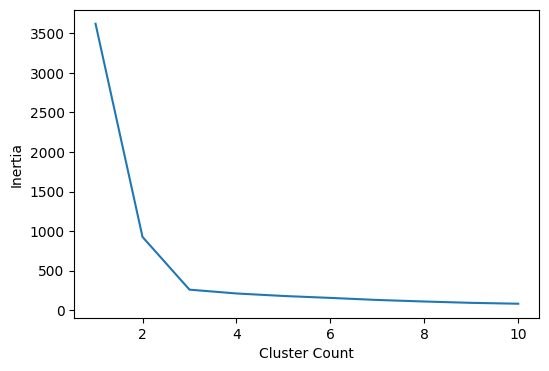

In [26]:
# there is an "elbow" around clusters=3
ax = s.plot.line(figsize=(6,4))
ax.set_ylabel("Inertia")
ax.set_xlabel("Cluster Count")

Text(0.5, 0, 'Cluster Count')

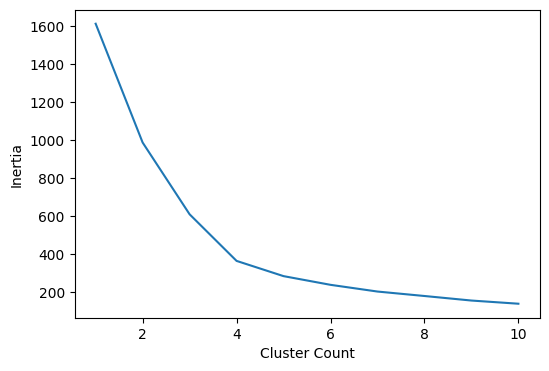

In [35]:
df2 = pd.DataFrame(np.random.uniform(0, 10, (100, 2)))

s = pd.Series(dtype=float)

for cluster_count in range(1, 11):
    km = KMeans(cluster_count)
    km.fit(df2)
    s.at[cluster_count] = km.inertia_

ax = s.plot.line(figsize=(6,4))
ax.set_ylabel("Inertia")
ax.set_xlabel("Cluster Count")
# no clear clusters in this dataset

# KMeans as Preprocessing

Sometimes we'll use an unsupervised learning technique (like k-means) to pre-process data, creating better inputs for a supervised learning technique (like logistic regression)

In [36]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [37]:
def make_data():
    x, y = datasets.make_blobs(n_samples=250, centers=5, random_state=5)
    xcols = ["x0", "x1"]
    df1 = pd.DataFrame(x, columns=xcols)
    df1["y"] = y > 0

    df2 = pd.DataFrame(np.random.uniform(-10, 10, size=(250, 2)), columns=["x0", "x1"])
    df2["y"] = False

    return pd.concat((df1, df2))

train, test = train_test_split(make_data())

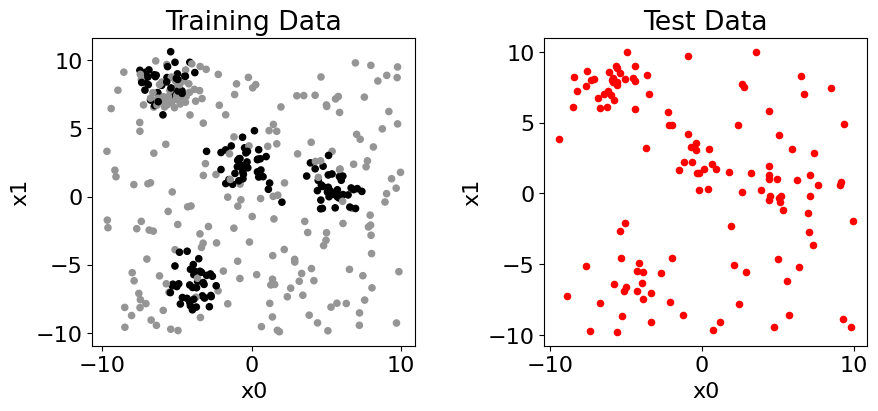

In [38]:
plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
train.plot.scatter(x="x0", y="x1", c=train["y"], vmin=-1, ax=ax[0])
test.plot.scatter(x="x0", y="x1", c="red", ax=ax[1])
ax[0].set_title("Training Data")
ax[1].set_title("Test Data")
plt.subplots_adjust(wspace=0.4)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("km", KMeans(10)),
    ("std", StandardScaler()),
    ("lr", LogisticRegression()),
])
pipe.fit(train[["x0", "x1"]], train["y"])
pipe.score(test[["x0", "x1"]], test["y"])

0.8

# StandardScaler with KMeans

<AxesSubplot:xlabel='0', ylabel='1'>

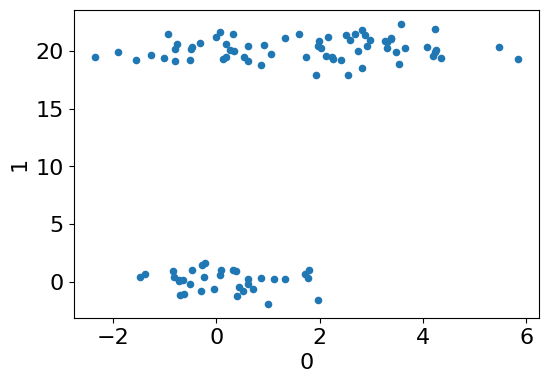

In [51]:
x = datasets.make_blobs(centers=np.array([(0,0), (0,20), (3,20)]))[0]
df = pd.DataFrame(x)
df.plot.scatter(x=0, y=1, figsize=(6,4))

In [56]:
KMeans(2).fit_predict(df)

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

<AxesSubplot:xlabel='0', ylabel='1'>

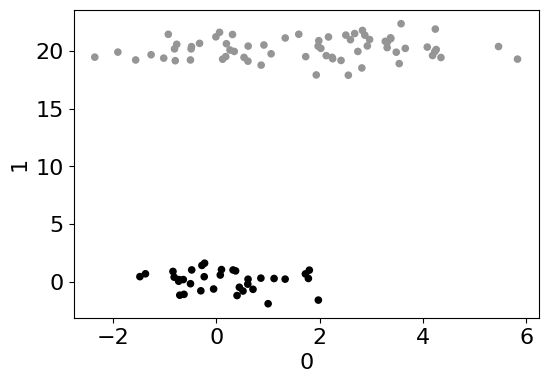

In [58]:
# -1 => white, 0 => gray, 1 => black
df.plot.scatter(x=0, y=1, figsize=(6,4), c=KMeans(2).fit_predict(df), vmin=-1, vmax=1)

In [62]:
df2 = df.copy()
df2[0] *= 1000 # km => m
df2.head()

,0,1
0,65.068265,21.621742
1,517.810141,-0.814130
2,711.285999,-0.666221
3,3312.288855,20.805741
4,2241.742137,19.449991


<AxesSubplot:xlabel='0', ylabel='1'>

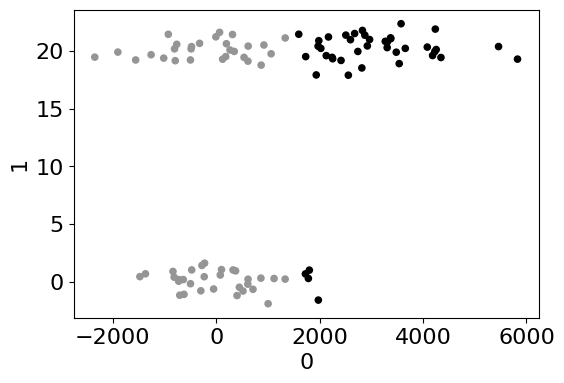

In [66]:
df2.plot.scatter(x=0, y=1, figsize=(6,4), c=KMeans(2).fit_predict(df2), vmin=-1, vmax=1)

In [67]:
pipe = Pipeline([
    ("std", StandardScaler()),
    ("km", KMeans(2)),
])

<AxesSubplot:xlabel='0', ylabel='1'>

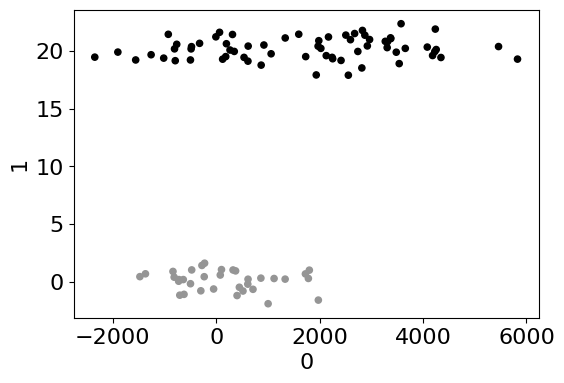

In [68]:
df2.plot.scatter(x=0, y=1, figsize=(6,4), c=pipe.fit_predict(df2), vmin=-1, vmax=1)